In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [ ]:
df = pd.read_csv('german_credit_data.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


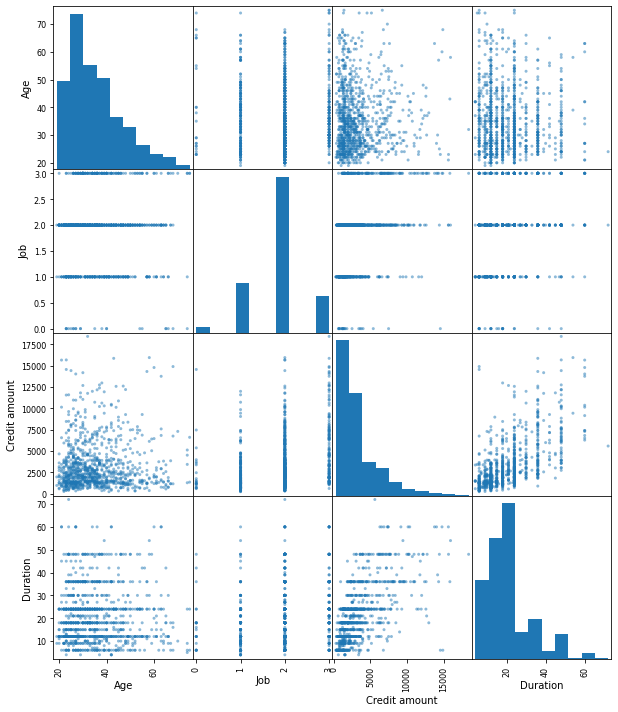

In [ ]:
scatter_matrix(df, figsize=(10, 12))
plt.show()

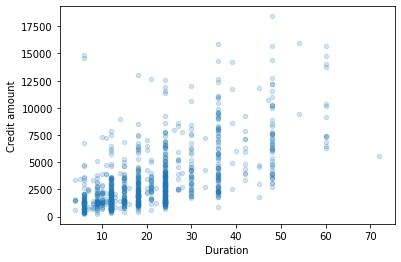

In [ ]:
df.plot(kind='scatter', x='Duration', y='Credit amount', alpha=0.2)
plt.show()

In [ ]:
training, test = train_test_split(df, test_size=0.3)

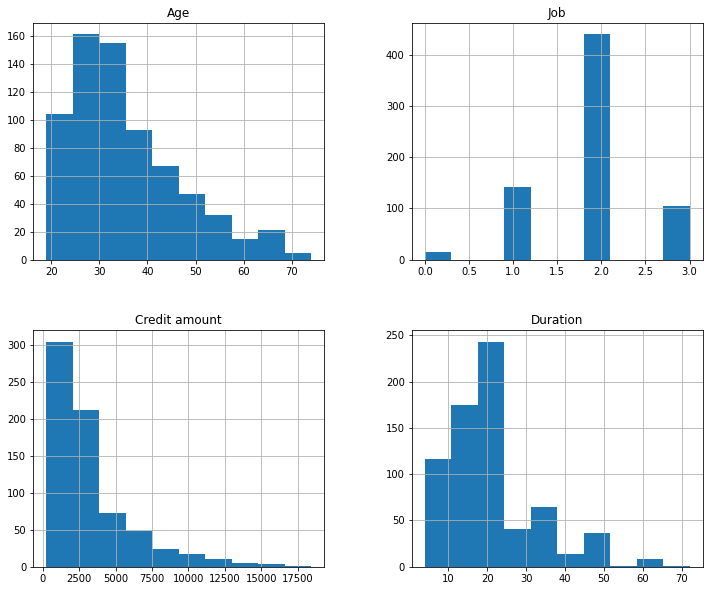

In [ ]:
training.hist(figsize=(12, 10))
plt.show()

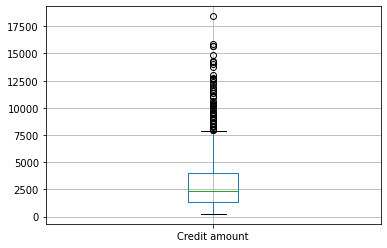

In [ ]:
training.boxplot(column='Credit amount')
plt.show()

In [ ]:
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


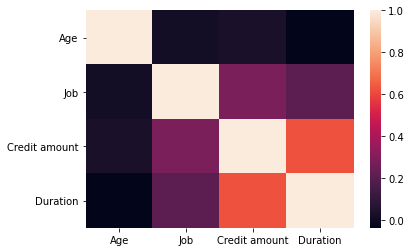

In [ ]:
sns.heatmap(df.corr())

In [ ]:
training_num = df[['Age', 'Job', 'Credit amount', 'Duration']]
training_num.head()

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24


In [ ]:
training_cat = training[['Risk']]

encoder = OneHotEncoder(sparse=False)
encoder.fit(training_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
encoder.transform([['good']])

array([[0., 1.]])

In [ ]:
pipe = Pipeline([('clean', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [ ]:
pipe.fit(training_num)

Pipeline(memory=None,
         steps=[('clean',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [ ]:
columnt = ColumnTransformer([('num_pipe', pipe, [0, 2, 6, 7]), ('cat', encoder, [9])])

In [ ]:
columnt.fit(df)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num_pipe',
                                 Pipeline(memory=None,
                                          steps=[('clean',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                        

In [ ]:
infoF = columnt.transform(df)

In [ ]:
infoF

array([[ 2.76645648,  0.14694918, -0.74513141, -1.23647786,  0.        ,
         1.        ],
       [-1.19140394,  0.14694918,  0.94981679,  2.24819436,  1.        ,
         0.        ],
       [ 1.18331231, -1.38377145, -0.41656241, -0.73866754,  0.        ,
         1.        ],
       ...,
       [ 0.21583532,  0.14694918, -0.87450324, -0.73866754,  0.        ,
         1.        ],
       [-1.10345149,  0.14694918, -0.50552769,  1.9992892 ,  1.        ,
         0.        ],
       [-0.75164167,  0.14694918,  0.46245715,  1.9992892 ,  0.        ,
         1.        ]])

In [ ]:
dataframeP = pd.DataFrame(data=infoF, columns=['Age', 'Job', 'Credit amount', 'Duration', 'Good', 'Bad'])


In [ ]:
dataframeP.head()

,Age,Job,Credit amount,Duration,Good,Bad
0,2.766456,0.146949,-0.745131,-1.236478,0.0,1.0
1,-1.191404,0.146949,0.949817,2.248194,1.0,0.0
2,1.183312,-1.383771,-0.416562,-0.738668,0.0,1.0
3,0.831502,0.146949,1.634247,1.750384,0.0,1.0
4,1.535122,0.146949,0.566664,0.256953,1.0,0.0
